In [46]:
import pandas as pd
import math
import matplotlib.pyplot as plt

In [16]:
def summariseData (path):
#     ./results/efficiency_.csv
    optimal_results = pd.read_csv(path)
    optimal_results.drop(['start','end','barrierID','roundID', 'path'], axis=1, inplace=True)
    grouped_optimals = optimal_results.groupby(['algorithm'])
    groupData = {}
    for groupName, group in grouped_optimals:
        columns = group.columns
        groupData[groupName] = {}
        for k in range(1, len(columns)):
            items = list(group[columns[k]])
            size = len(items)
            mean = sum(list(items)) / size
            data = list(items)
            data.sort()
    #         print(data)
            median = data[math.floor(size/2)]
            groupData[groupName][columns[k]] = round(median) if columns[k] != 'duration' else median 
    
    fields = ['algorithms'] + list(groupData['a2'])
    
    tableMeta = {}

    """
        'algorithms':[],
        'numberOfRightAngleTurns':[]
        ...
    """

    for x in fields:
        tableMeta[x] = []

    for alg in groupData:
        tableMeta['algorithms'].append(alg)
        for field in groupData[alg]:
            tableMeta[field].append(groupData[alg][field])

    return pd.DataFrame(tableMeta)

In [22]:
summarised_optimality = summariseData('./results/established/optimality_.csv')
summarised_efficiency = summariseData('./results/established/efficiency_.csv')

In [57]:
summarised_optimality

,algorithms,numberOfRightAngleTurns,visitExcess,duration,pathSize,maxMemory
0,a2,20,1515,0.009050,97,268988
1,lee,20,16886,0.078469,97,2190560
2,mg4,9,1,0.001353,101,28332
3,mg5,14,16,0.001438,101,32065


In [58]:
summarised_efficiency

,algorithms,numberOfRightAngleTurns,visitExcess,duration,pathSize,maxMemory
0,a2,40,255,0.001883,105,67420
1,lee,40,954,0.004546,105,138492
2,mg4,40,691,0.026262,105,66716
3,mg5,40,226,0.004680,105,39821


In [45]:
tables = {'a2':{}, 'lee':{}, 'mg4':{}, 'mg5':{}}

for index in range(1, 31):
    path = f'./results/robustness_{index}%.csv'
    summarised = summariseData(path)
    columns = summarised.columns
    for colName, value in summarised.iterrows():
        items = list(value)
        alg = items[0]                
        for j in range(1, len(columns)):
            key = columns[j]
            if key not in tables[alg]:
                tables[alg][key] = []
            tables[alg][key].append(items[j])

In [50]:
list(tables['a2'])

['numberOfRightAngleTurns', 'visitExcess', 'duration', 'pathSize', 'maxMemory']

In [91]:
ti = 0
def drawGraph (metric):
    global ti
    plt.figure(ti)
    plt.rcParams["figure.figsize"] = (15,5)
    plt.rcParams['font.size'] = 18
    for alg in tables:
        plt.plot([x for x in range(1, 31)], tables[alg][metric], label = alg )
    hfont = {'fontname':'Helvetica'}
    plt.xlabel("Obstacles in percentages (%)", **hfont)
    plt.title(f'{metric} with respect to noise', **hfont)
    plt.ylabel(metric)
    plt.legend()
#     plt.show()  
    plt.savefig(f'./results/diagrams/{metric}.png')
    ti+=1

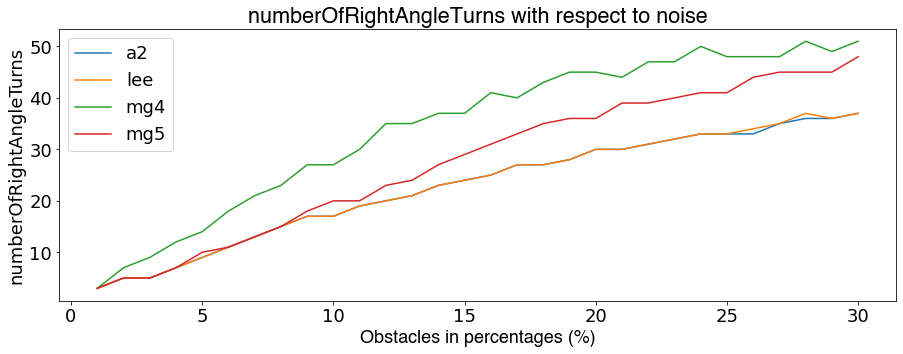

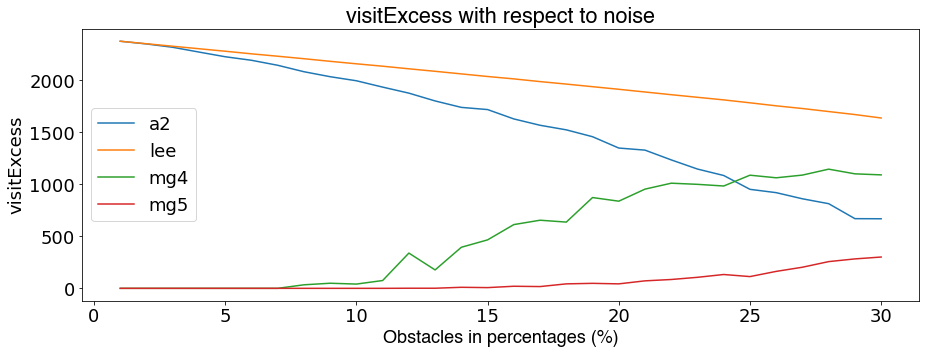

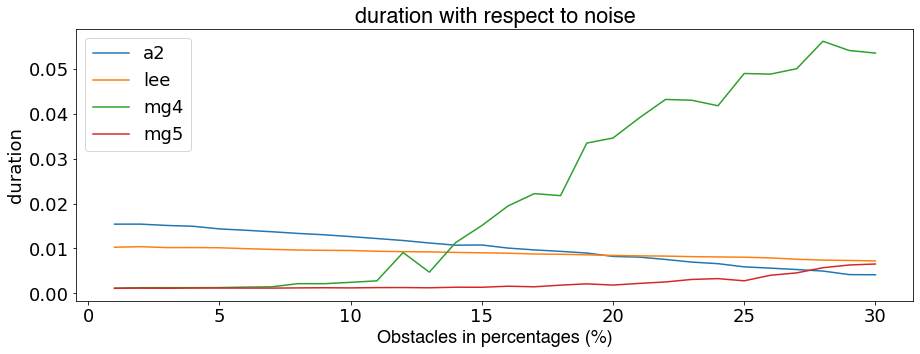

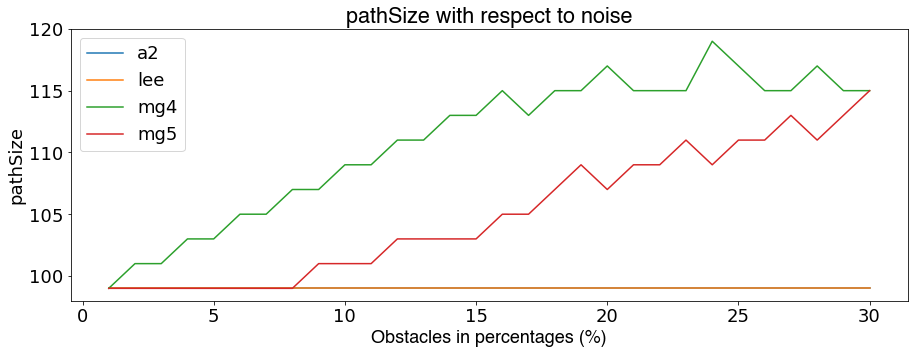

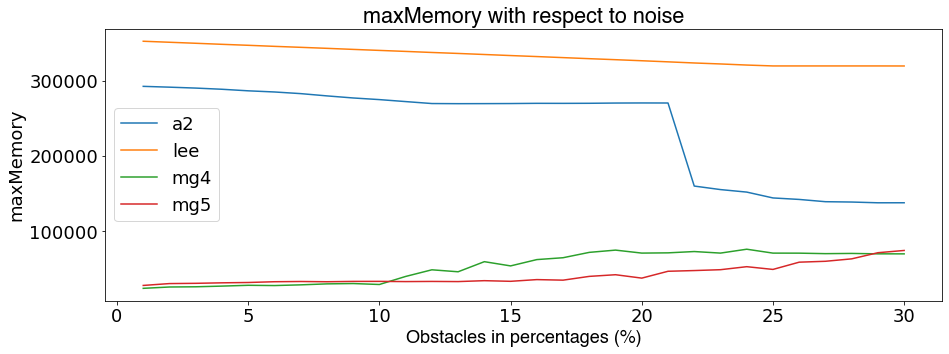

In [92]:
for metric in list(tables['a2']):
    drawGraph(metric)